<a href="https://colab.research.google.com/github/LlanosAdan/Data-Science-and-Analysis/blob/main/EDA_Iris_Analisis_Exploratorio_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

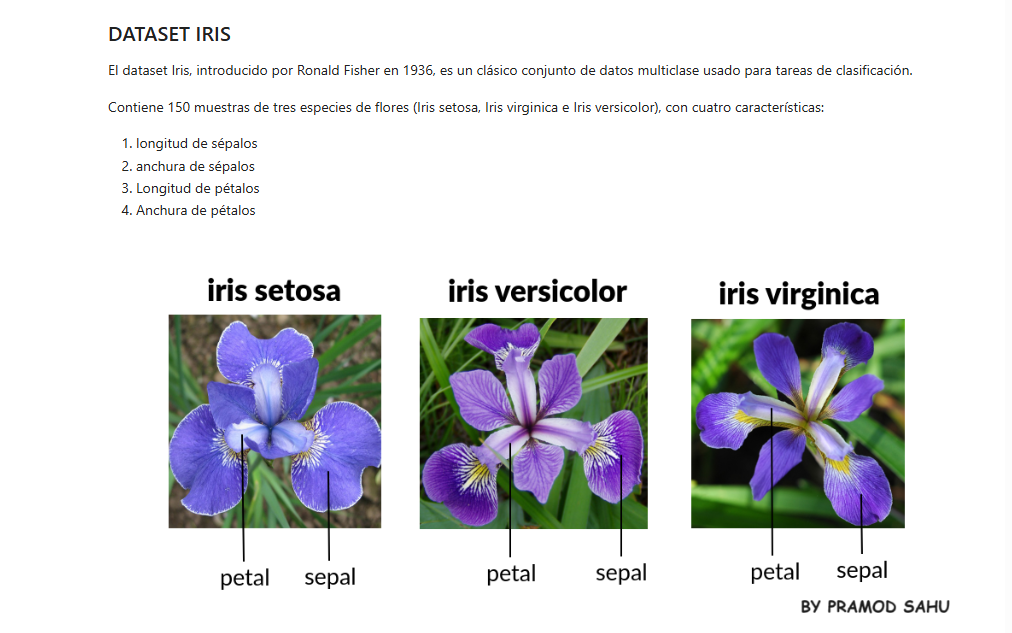



Objetivo:
El objetivo principal es desarrollar un modelo capaz de clasificar con alta precisión las especies de flores, utilizando para ello las características disponibles.

1. Preparación de Datos

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [31]:
%matplotlib inline

# Configurar estilo de plt
plt.style.use("bmh")
# Configurar estilo de Seaborn
sns.set(style="whitegrid")

In [32]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
#Renombramos las variables para falicitar su uso
df.rename({'SepalLengthCm':'sep_l',
           'SepalWidthCm':'sep_a',
           'PetalLengthCm':'pet_l',
           'PetalWidthCm':'pet_a',
           'Species':'especie'},
          axis=1, inplace=True)

In [34]:
#Limpieza de Datos (limpiamos id)

df.drop('Id', axis=1, inplace=True)
df.head(7)

,sep_l,sep_a,pet_l,pet_a,especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


In [35]:
df.shape #dimension del dataset cantidad de filas y columnas

(150, 5)

In [36]:
df.info() #Informacion general del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sep_l    150 non-null    float64
 1   sep_a    150 non-null    float64
 2   pet_l    150 non-null    float64
 3   pet_a    150 non-null    float64
 4   especie  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
df.describe()  #analisis descriptivo

,sep_l,sep_a,pet_l,pet_a
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
#Recuento de la variable a predecir (tenemos 3 especies 50 de cada una)

df['especie'].value_counts()

,count
especie,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


<ipython-input-39-d0e6c326a209>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='especie', palette='pastel')


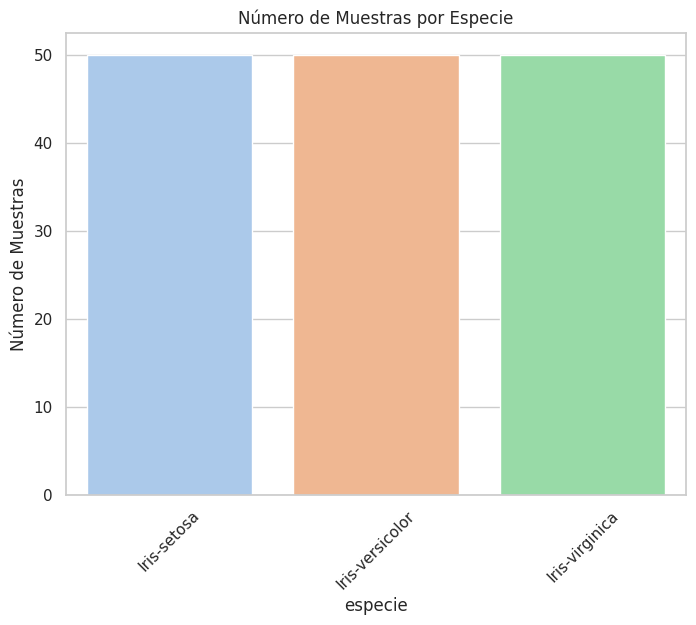

In [39]:
#  gráfico de barras
counts =  df['especie'].value_counts()
# gráfico de barras usando Seaborn con colores diferentes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='especie', palette='pastel')
plt.ylabel('Número de Muestras')
plt.title('Número de Muestras por Especie')
plt.xticks(rotation=45)
plt.show()

In [40]:
df.isnull().sum(axis=0) #verificamos si hay valores nulos

,0
sep_l,0
sep_a,0
pet_l,0
pet_a,0
especie,0


**Analisis Univariante**

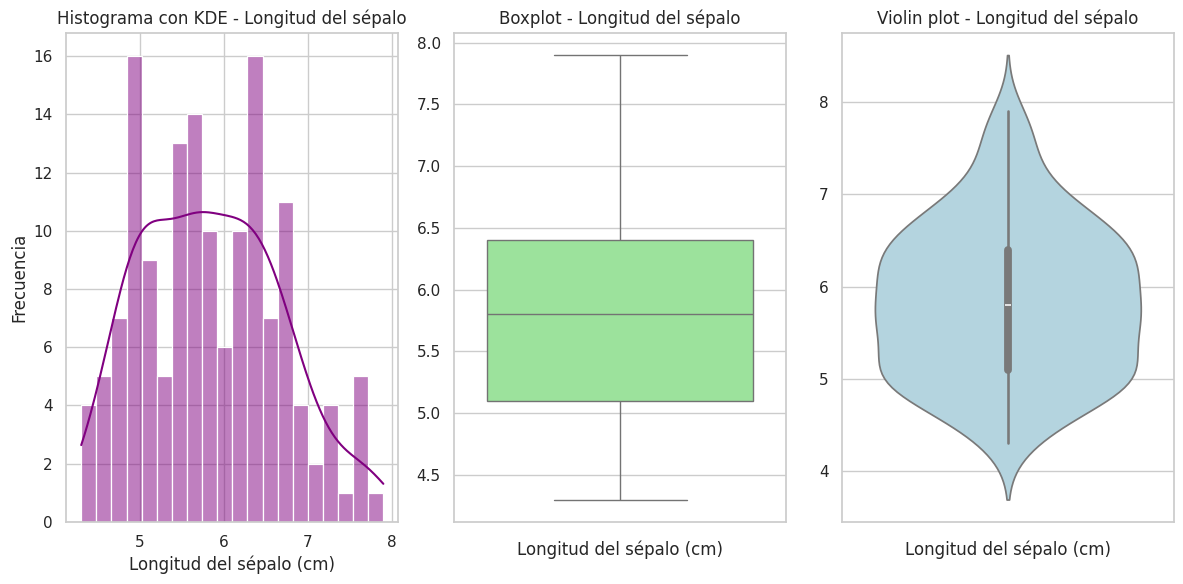

In [41]:
#Longitud del Sépalo

# 1. Histograma con KDE
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['sep_l'], kde=True, bins=20, color='purple')
plt.title('Histograma con KDE - Longitud del sépalo')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Frecuencia')

# 2. Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['sep_l'], color='lightgreen')
plt.title('Boxplot - Longitud del sépalo')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('')

# 3. Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(y=df['sep_l'], color='lightblue')
plt.title('Violin plot - Longitud del sépalo')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

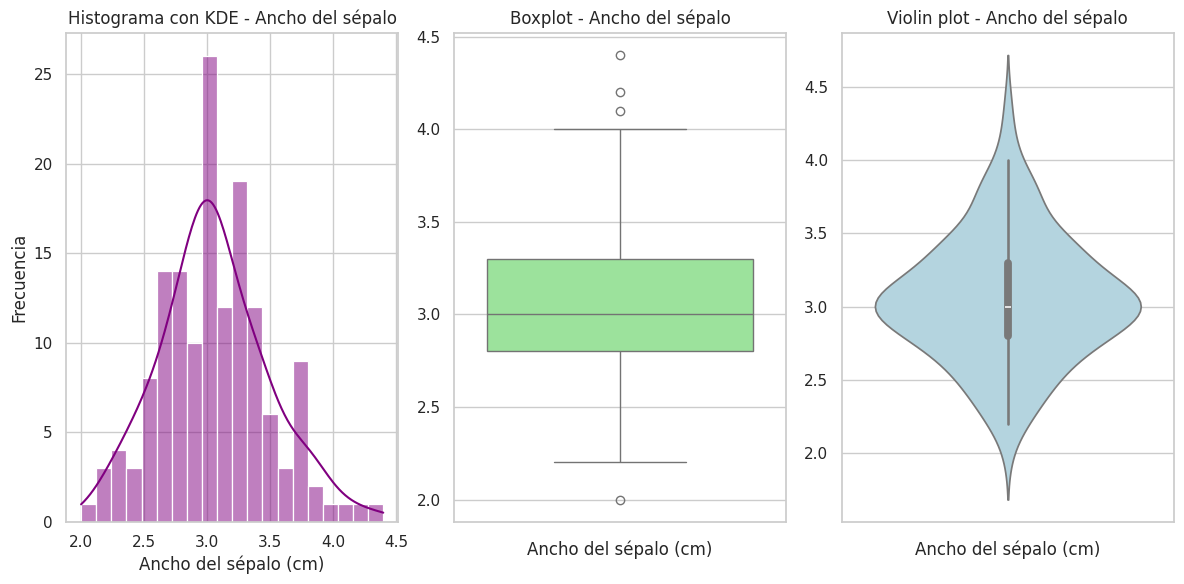

In [42]:
#Ancho del Sépalo

# 1. Histograma con KDE
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['sep_a'], kde=True, bins=20, color='purple')
plt.title('Histograma con KDE - Ancho del sépalo')
plt.xlabel('Ancho del sépalo (cm)')
plt.ylabel('Frecuencia')

# 2. Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['sep_a'], color='lightgreen')
plt.title('Boxplot - Ancho del sépalo')
plt.xlabel('Ancho del sépalo (cm)')
plt.ylabel('')

# 3. Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(y=df['sep_a'], color='lightblue')
plt.title('Violin plot - Ancho del sépalo')
plt.xlabel('Ancho del sépalo (cm)')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


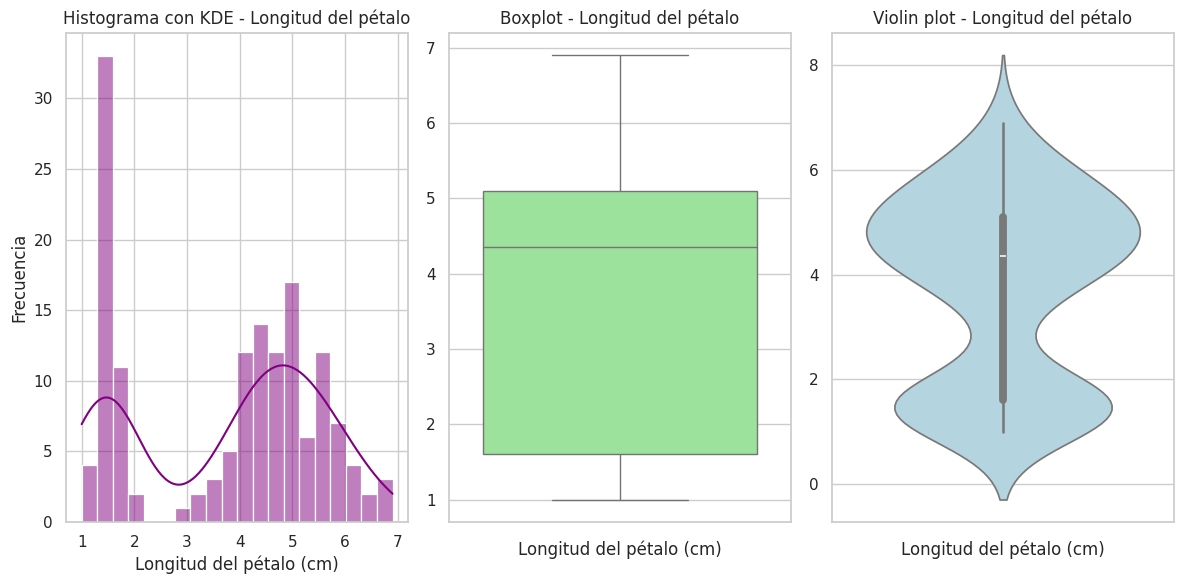

In [43]:
#Longitud del pétalo

# 1. Histograma con KDE
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['pet_l'], kde=True, bins=20, color='purple')
plt.title('Histograma con KDE - Longitud del pétalo')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('Frecuencia')

# 2. Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['pet_l'], color='lightgreen')
plt.title('Boxplot - Longitud del pétalo')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('')

# 3. Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(y=df['pet_l'], color='lightblue')
plt.title('Violin plot - Longitud del pétalo')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

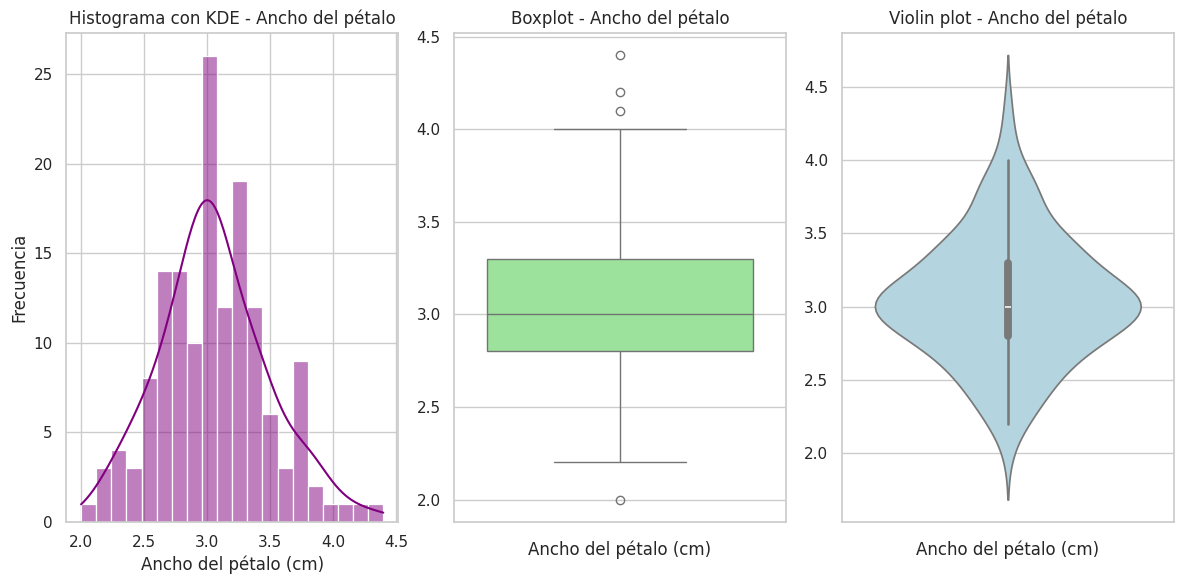

In [44]:
#Ancho del pétalo


# 1. Histograma con KDE
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['sep_a'], kde=True, bins=20, color='purple')
plt.title('Histograma con KDE - Ancho del pétalo')
plt.xlabel('Ancho del pétalo (cm)')
plt.ylabel('Frecuencia')

# 2. Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['sep_a'], color='lightgreen')
plt.title('Boxplot - Ancho del pétalo')
plt.xlabel('Ancho del pétalo (cm)')
plt.ylabel('')

# 3. Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(y=df['sep_a'], color='lightblue')
plt.title('Violin plot - Ancho del pétalo')
plt.xlabel('Ancho del pétalo (cm)')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Analisis **Multivariante**

<ipython-input-45-b1ec3b774744>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='especie', y='sep_l', palette='Set1', ax=axs[0, 1])
<ipython-input-45-b1ec3b774744>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='especie', y='sep_l', palette='Set1', ax=axs[1, 0])


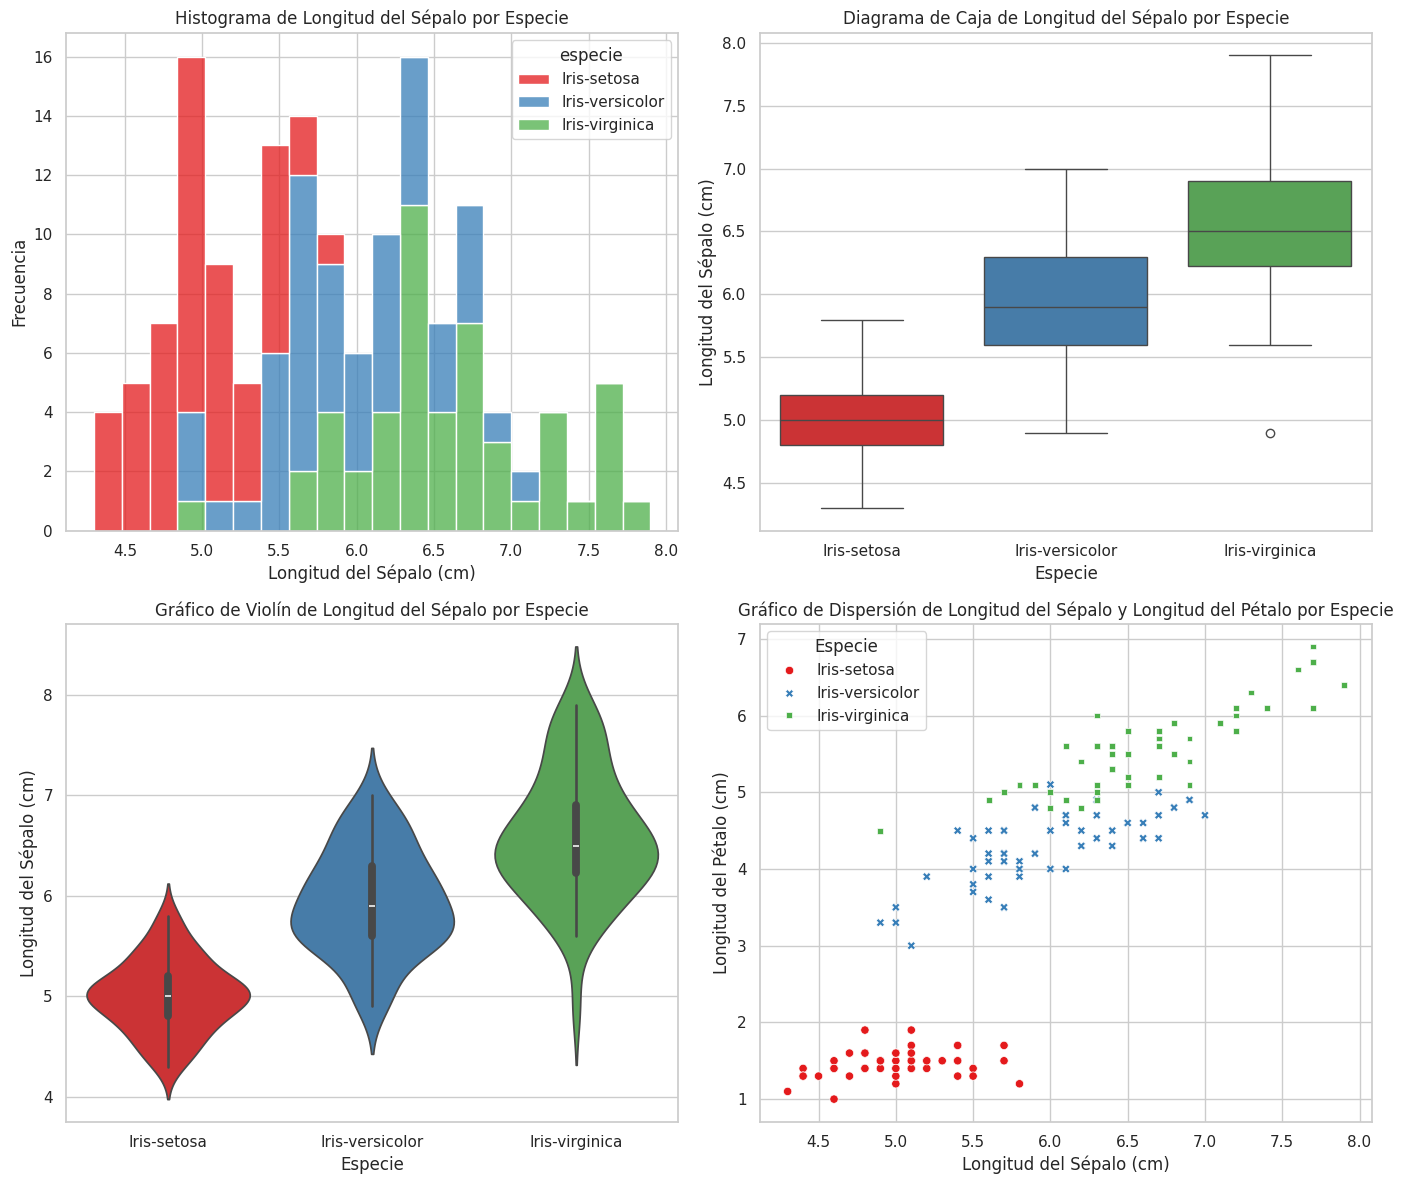

In [45]:
 #Longitud de Sépalo y Especie

# Crear una figura con una cuadrícula de 2x2 subgráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. Histograma de Longitud del Sépalo por Especie
sns.histplot(data=df, x='sep_l', hue='especie', multiple='stack', palette='Set1', bins=20, ax=axs[0, 0])
axs[0, 0].set_title('Histograma de Longitud del Sépalo por Especie')
axs[0, 0].set_xlabel('Longitud del Sépalo (cm)')
axs[0, 0].set_ylabel('Frecuencia')

# 2. Diagrama de Caja (Boxplot) de Longitud del Sépalo por Especie
sns.boxplot(data=df, x='especie', y='sep_l', palette='Set1', ax=axs[0, 1])
axs[0, 1].set_title('Diagrama de Caja de Longitud del Sépalo por Especie')
axs[0, 1].set_xlabel('Especie')
axs[0, 1].set_ylabel('Longitud del Sépalo (cm)')

# 3. Gráfico de Violín de Longitud del Sépalo por Especie
sns.violinplot(data=df, x='especie', y='sep_l', palette='Set1', ax=axs[1, 0])
axs[1, 0].set_title('Gráfico de Violín de Longitud del Sépalo por Especie')
axs[1, 0].set_xlabel('Especie')
axs[1, 0].set_ylabel('Longitud del Sépalo (cm)')

# 4. Gráfico de Dispersión (Scatter Plot) de Longitud del Sépalo por Especie
sns.scatterplot(data=df, x='sep_l', y='pet_l', hue='especie', palette='Set1', style='especie', ax=axs[1, 1])
axs[1, 1].set_title('Gráfico de Dispersión de Longitud del Sépalo y Longitud del Pétalo por Especie')
axs[1, 1].set_xlabel('Longitud del Sépalo (cm)')
axs[1, 1].set_ylabel('Longitud del Pétalo (cm)')
axs[1, 1].legend(title='Especie')

# Ajustar el espacio entre subgráficos
plt.tight_layout()
plt.show()

<ipython-input-46-ac2b9d3d7af5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='especie', y='sep_a', palette='Set1', ax=axs[0, 1])
<ipython-input-46-ac2b9d3d7af5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='especie', y='sep_a', palette='Set1', ax=axs[1, 0])


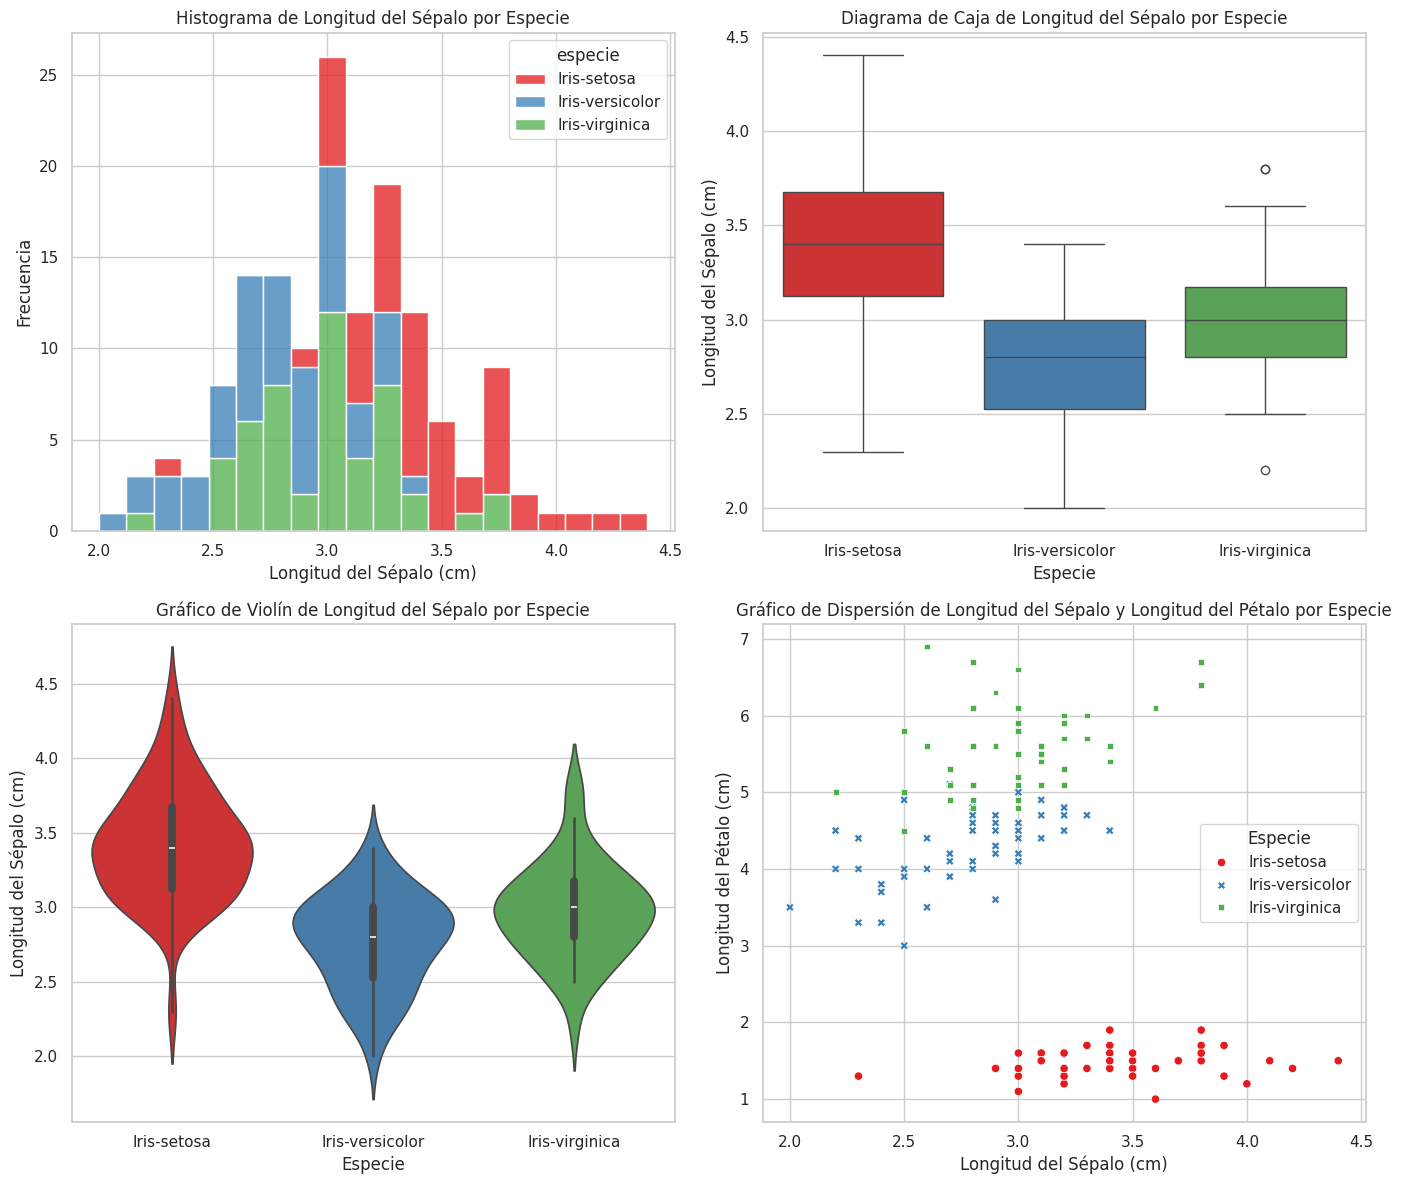

In [46]:
#Longitud de Sépalo y Especie

# Crear una figura con una cuadrícula de 2x2 subgráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. Histograma de Longitud del Sépalo por Especie
sns.histplot(data=df, x='sep_a', hue='especie', multiple='stack', palette='Set1', bins=20, ax=axs[0, 0])
axs[0, 0].set_title('Histograma de Longitud del Sépalo por Especie')
axs[0, 0].set_xlabel('Longitud del Sépalo (cm)')
axs[0, 0].set_ylabel('Frecuencia')

# 2. Diagrama de Caja (Boxplot) de Longitud del Sépalo por Especie
sns.boxplot(data=df, x='especie', y='sep_a', palette='Set1', ax=axs[0, 1])
axs[0, 1].set_title('Diagrama de Caja de Longitud del Sépalo por Especie')
axs[0, 1].set_xlabel('Especie')
axs[0, 1].set_ylabel('Longitud del Sépalo (cm)')

# 3. Gráfico de Violín de Longitud del Sépalo por Especie
sns.violinplot(data=df, x='especie', y='sep_a', palette='Set1', ax=axs[1, 0])
axs[1, 0].set_title('Gráfico de Violín de Longitud del Sépalo por Especie')
axs[1, 0].set_xlabel('Especie')
axs[1, 0].set_ylabel('Longitud del Sépalo (cm)')

# 4. Gráfico de Dispersión (Scatter Plot) de Longitud del Sépalo por Especie
sns.scatterplot(data=df, x='sep_a', y='pet_l', hue='especie', palette='Set1', style='especie', ax=axs[1, 1])
axs[1, 1].set_title('Gráfico de Dispersión de Longitud del Sépalo y Longitud del Pétalo por Especie')
axs[1, 1].set_xlabel('Longitud del Sépalo (cm)')
axs[1, 1].set_ylabel('Longitud del Pétalo (cm)')
axs[1, 1].legend(title='Especie')

# Ajustar el espacio entre subgráficos
plt.tight_layout()
plt.show()


#CONCLUIMOS QUE LA LONGITUD DEL SEPALO Y LA ESPECIE ESTAN CORRELACIONADAS
#POR EJEMPLO IRIS SETOSA TIENE UNA LONGITUD MUCHO MENOR, SE DISTINGUE LA LONGITUD DEL SEPALO.

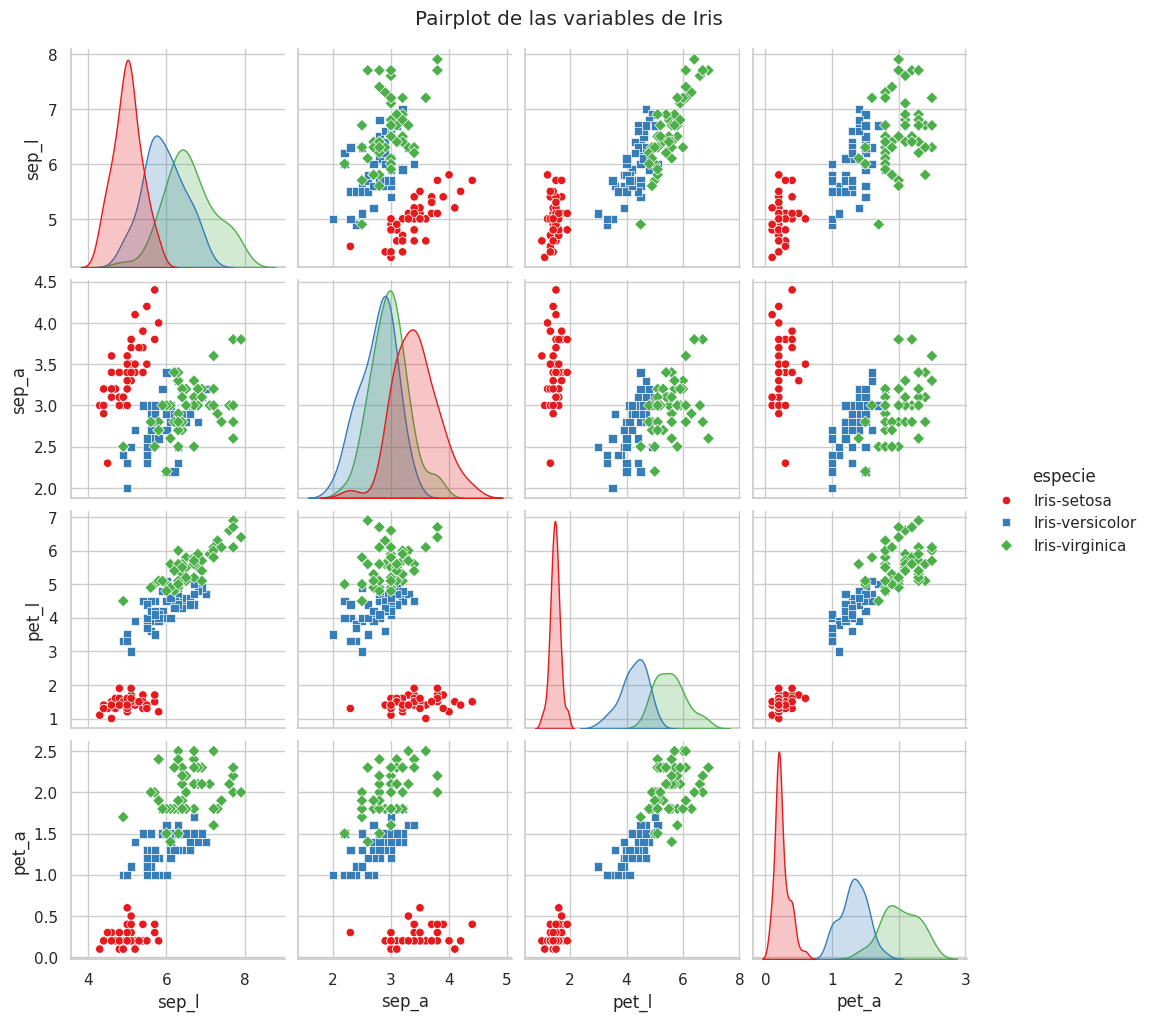

In [47]:
#Relación entre todas las variables
# Pairplot: muestra la relación entre todas las variables
sns.pairplot(df, hue='especie', markers=["o", "s", "D"], palette="Set1")
plt.suptitle('Pairplot de las variables de Iris', y=1.02)
plt.show()


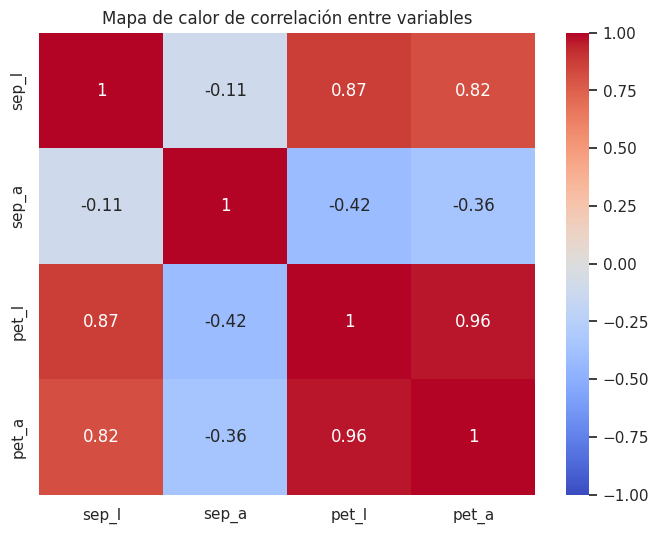

In [50]:
# 2 Heatmap de la correlación entre variables
plt.figure(figsize=(8, 6))
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de correlación entre variables')
plt.show()


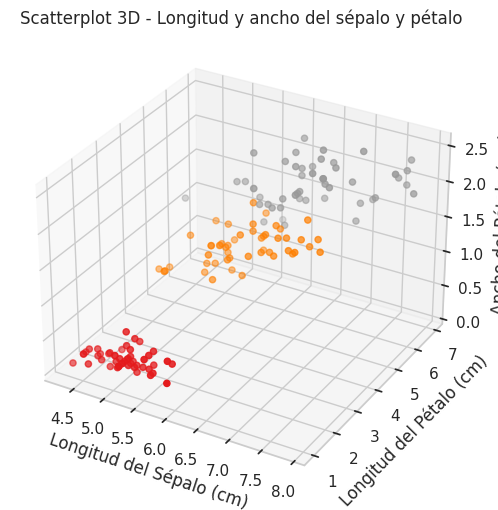

In [51]:
#Scatterplot 3D: mostrar la relación entre 3 variables

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Crear scatterplot 3D usando 3 dimensiones: longitud del sépalo, longitud del pétalo y ancho del pétalo
scatter = ax.scatter(
    df['sep_l'],
    df['pet_l'],
    df['pet_a'],
    c=pd.Categorical(df['especie']).codes,
    cmap='Set1'
)

# Etiquetas
ax.set_xlabel('Longitud del Sépalo (cm)')
ax.set_ylabel('Longitud del Pétalo (cm)')
ax.set_zlabel('Ancho del Pétalo (cm)')
plt.title('Scatterplot 3D - Longitud y ancho del sépalo y pétalo')

# Mostrar gráfico
plt.show()